# Project: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order.csv


In [3]:
# reading the data
df = pd.read_csv('foodhub_order.csv')
# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

In [4]:
rows, columns = df.shape
print("Rows:", rows, "Columns:", columns)

Rows: 1898 Columns: 9


#### Observations:
The DataFrame has 9 columns and 1898 rows.


### What are the datatypes of the different columns in the dataset?

In [5]:
df.info() # Verifying the different datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 3 different datatypes; float64(1), int64(4), object(4)


### Are there any missing values in the data? If so, we will treat them using an appropriate method

In [6]:
missing_values = df.isnull().sum() # Verifying if there are any missing values
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values.


### Checking the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
min = df['food_preparation_time'].min() # Summary statistics of the numerical data for the time it takes for food to be prepared once an order is placed
avg = df['food_preparation_time'].mean()
max = df['food_preparation_time'].max()
print("Minimum:", min, "Average:", round(avg, 2), "Maximum:", max)

Minimum: 20 Average: 27.37 Maximum: 35


#### Observations:
The average time for the food to be prepared once an order is placed is 27.37 min.


### How many orders are not rated?

In [8]:
unrated_orders = 0

for rating in df['rating']:
    if rating == 'Not given':
       unrated_orders += 1
print(f"Orders not rated: {unrated_orders}")

Orders not rated: 736


### Observations:

38.77% of the orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### We will explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

## Order ID

In [9]:
df['order_id'].nunique() # checking unique order ID's

1898

## Customer ID

In [10]:
df['customer_id'].nunique() # Finding out number of unique Customer ID

1200

## Restaurant Name

In [11]:
df['restaurant_name'].nunique() # Finding out number of unique Restaurant Name

178

## Cuisine Type

In [12]:
df['cuisine_type'].nunique() # Finding out number of unique Cuisine Type

14

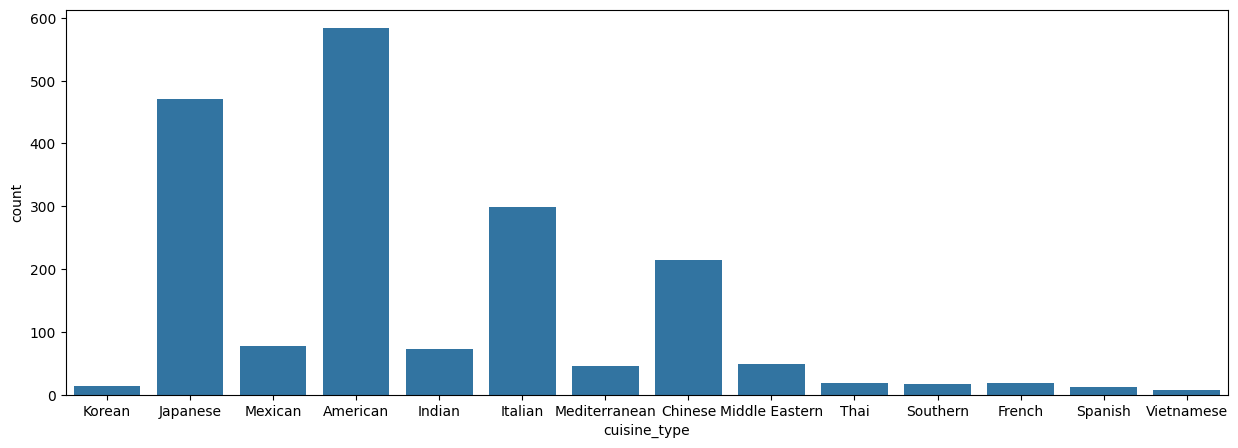

In [13]:
plt.figure(figsize = (15,5)) #Visualizing number of orders by Cuisine Type with a countplot
sns.countplot(data = df, x = 'cuisine_type')
plt.show()

### Observations:

The most popular cuisine for this orders is the American and the least popular is the Vietnamise cuisine.

## Cost of the order

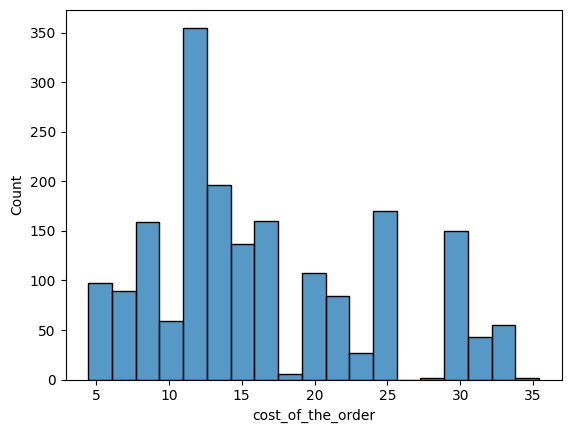

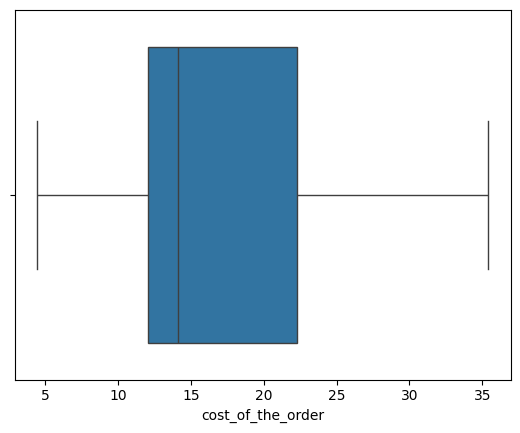

In [14]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

### Observations:

* The most common order cost is around 15.
* A significant number of orders lie between the 10-25 cost range.
* Very few orders are priced above 30.
* The majority of orders are concentrated in the mid-price range, which is also supported by the compactness of the box plot.

## Day of the week

In [15]:
df['day_of_the_week'].nunique() # Checking unique values for the 'day_of_the_week' column

2

There are only 2 values: Weekday and Weekend.

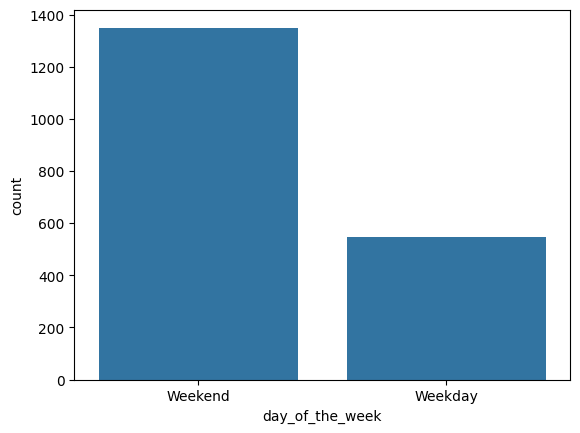

In [16]:
sns.countplot(data = df, x = 'day_of_the_week') # Creating bargraph for the 'day_of_the_week' column
plt.show()

There is a higher amount of orders during the Weekend.

## Rating

In [17]:
df['rating'].nunique() # Checking unique values for the 'rating' column

4

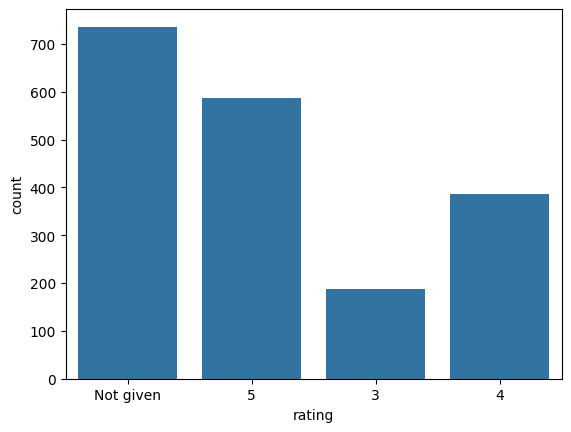

In [18]:
sns.countplot(data = df, x = 'rating') # Bar graph for the 4 unique rating values
plt.show()

### Observations:

The most repeated value is "Not given", meaning that many of the orders placed are not rated by the clients. Among the rated instances, the majority have received very positive feedback (ratings of 5).
Ratings of 4 are also common, indicating general satisfaction.
   

## Food Preparation Time

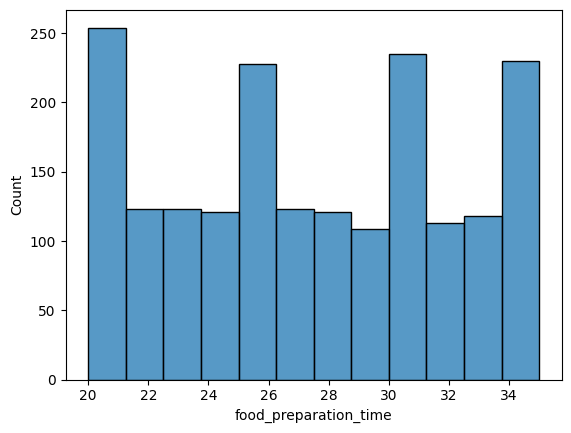

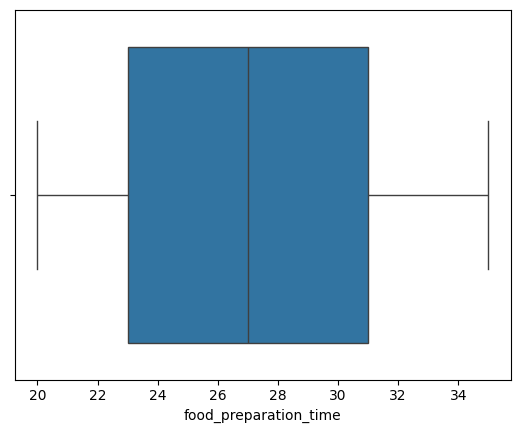

In [19]:
sns.histplot(data = df, x = 'food_preparation_time') # Histogram for the Food Preparation Time
plt.show()
sns.boxplot(data = df, x = 'food_preparation_time') # Boxplot for the Food Preparation Time
plt.show()

### Observations:

Most food preparations are completed between 24 and 30 minutes, with a central tendency slightly below 28 minutes.The data is fairly consistent, with preparation times generally ranging from a bit over 20 minutes to just under 34 minutes.

## Delivery Time

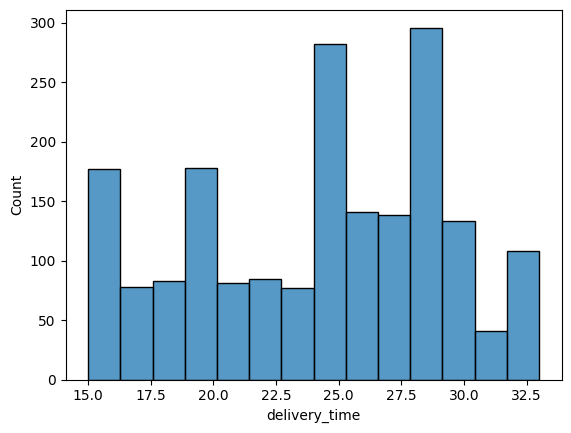

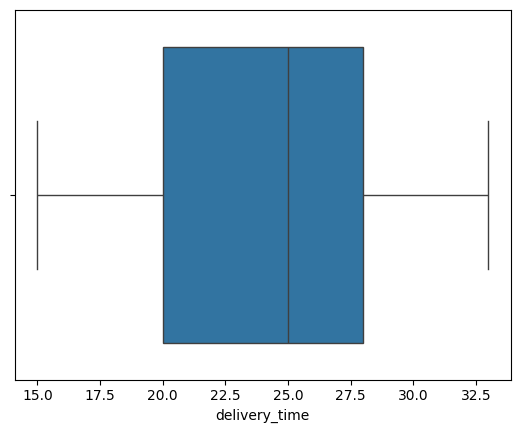

In [20]:
sns.histplot(data = df, x = 'delivery_time') # Histogram for the Delivery Time
plt.show()
sns.boxplot(data = df, x = 'delivery_time') # Boxplot for the Delivery Time
plt.show()

### Observations:
Most of the deliveries occur within a time frame of 22.5 to 30 minutes, with the central tendency being just below 27.5 minutes. The data seems to be fairly consistent without any significant outliers.

### Which are the top 5 restaurants in terms of the number of orders received?

In [21]:
df['restaurant_name'].value_counts().head(5) # Determining the top 5 restaurants in terms of orders received

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack is the restaurant with the most orders and it belongs to the american cuisine category.


### Which is the most popular cuisine on weekends?

In [22]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] # Checking the most popular cuisine on weekends
df_weekend['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
American cuisine is the most popular during the weekends and weekdays as well.


### What percentage of the orders cost more than 20 dollars?

In [23]:
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### What is the mean order delivery time?

In [24]:
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean delivery time is 24.16 minutes but this is after the time it takes for the food to be prepared.


### If the company decided to give 20% discount vouchers to the top 3 most frequent customers, what would be the IDs of these customers and the number of orders they placed?

In [25]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### Let's perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

## Cuisine vs Cost of the order

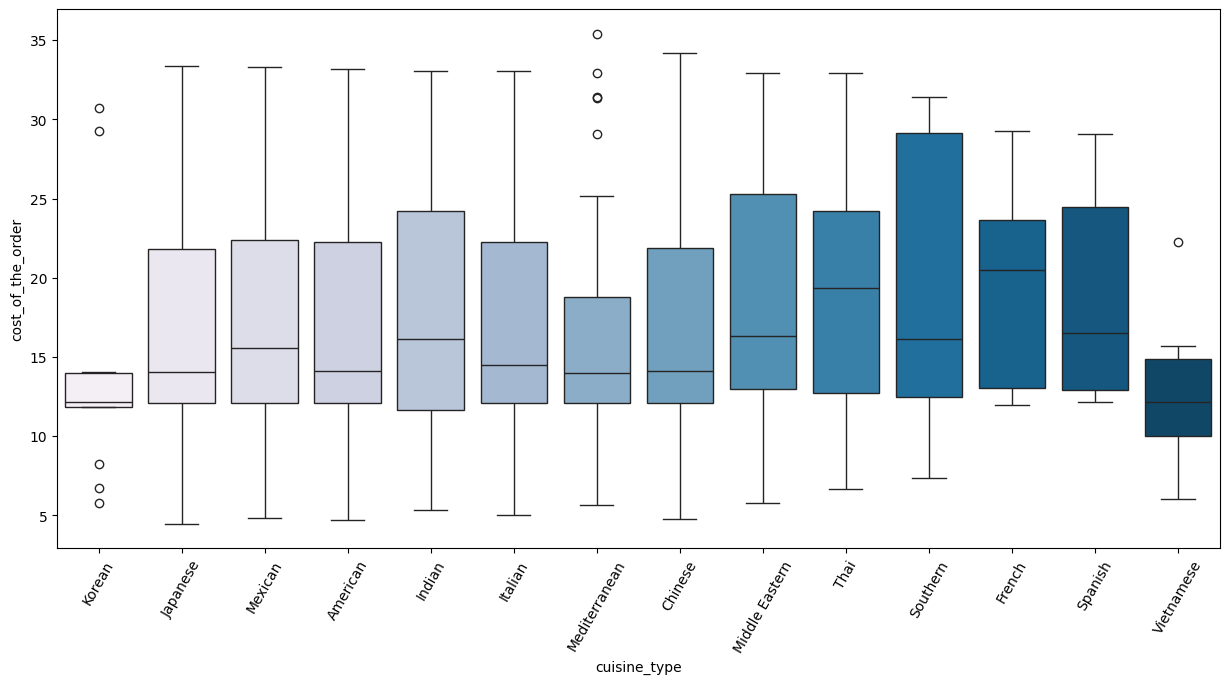

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, hue = "cuisine_type", palette = 'PuBu', legend = False)
plt.xticks(rotation = 60)
plt.show()

### Observations:

* Korean cuisine appears to be the most affordable with the lowest median cost.
* Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French, and Spanish cuisines have their median costs around the $17.5 to $19.5 range.
* Vietnamese cuisine is relatively cheaper, with a median around $15, but not as low as Korean cuisine.

## Cuisine vs Food Preparation time

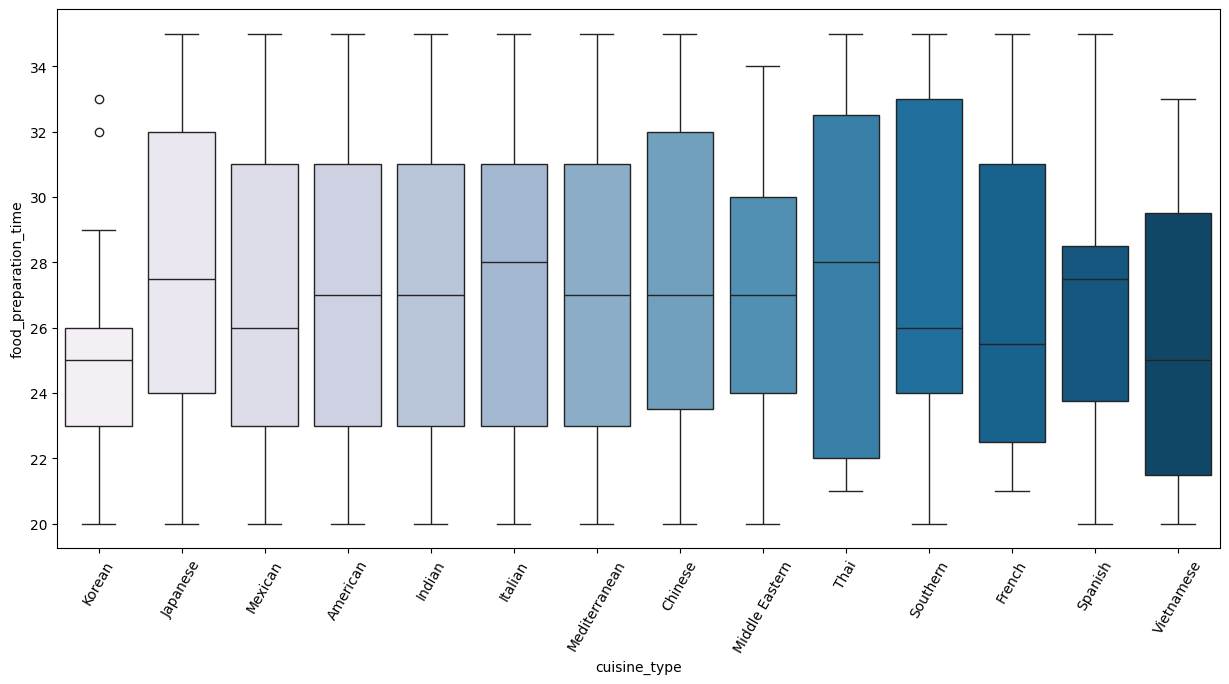

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, hue = "cuisine_type", palette = 'PuBu', legend = False)
plt.xticks(rotation = 60)
plt.show()

### Observations:

Korean cuisine has the shortest median food preparation time at around 22 minutes, but it also shows outliers indicating occasional longer preparation times.
Most of the other cuisines have their medians around the 28.5 to 30 minutes mark, suggesting a similar average preparation time across these cuisines.

## Day of the Week vs Delivery time

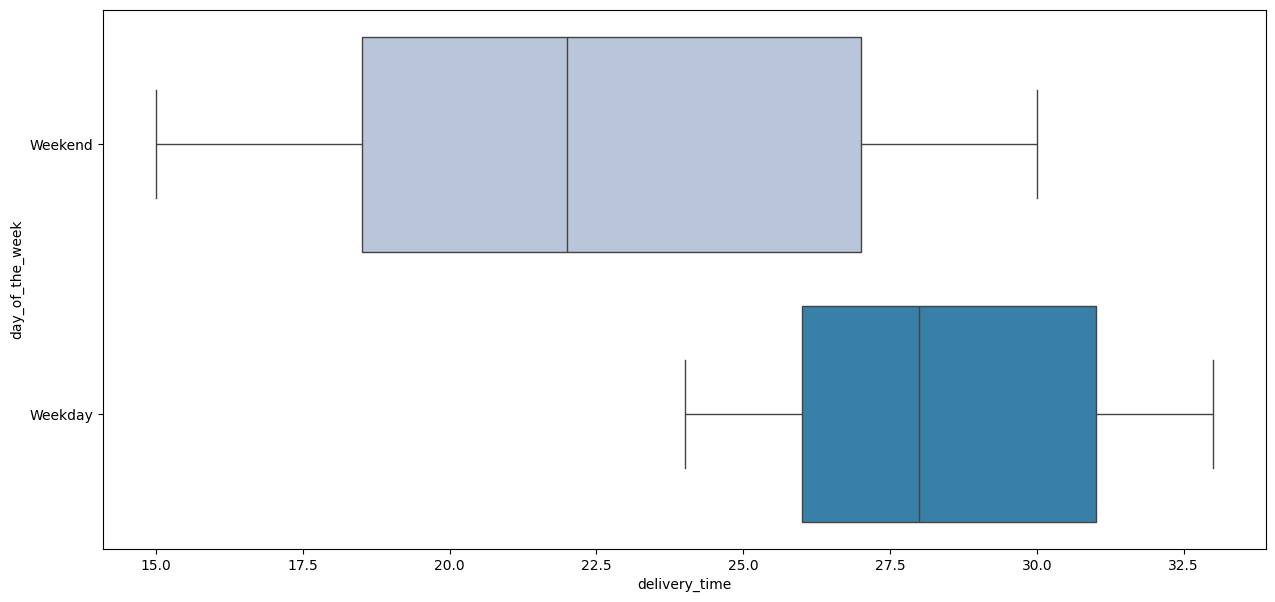

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, hue = "day_of_the_week", palette = 'PuBu', legend = False)
plt.show()

### Observations:

The graph suggests that customers might experience slightly faster deliveries on weekends, but with a broader range of possible delivery times. On weekdays, the delivery times are a bit more consistent, although slightly longer on average.

## Rating vs Delivery time

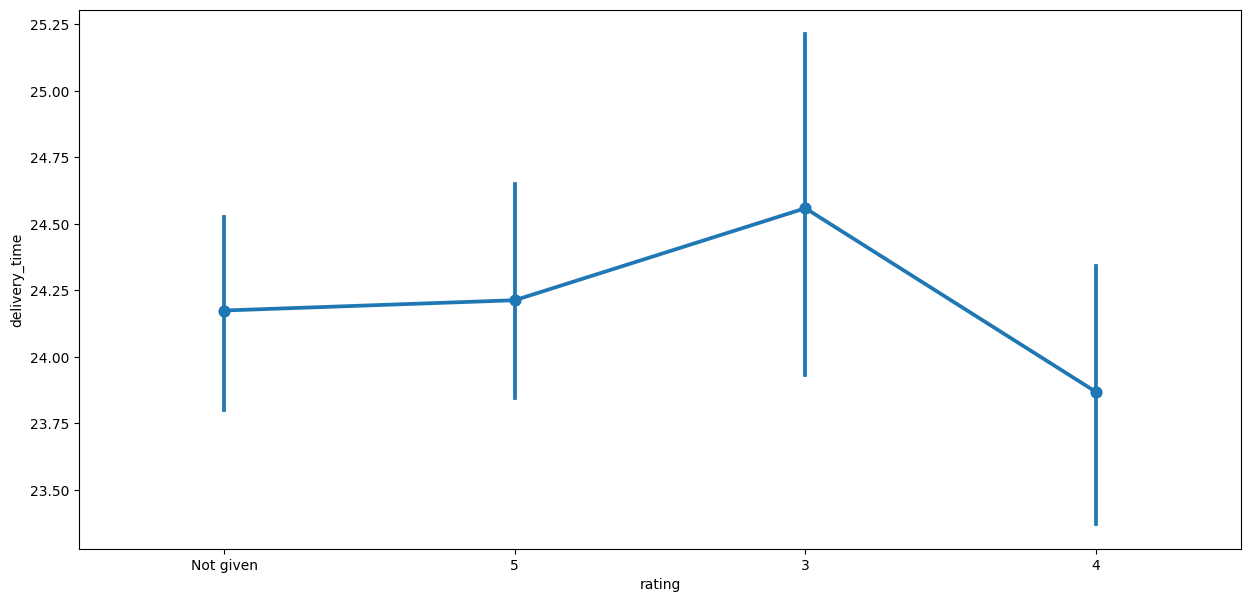

In [35]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Observations:

Faster delivery times (as seen in the 4-star rating) might positively influence customer satisfaction. Longer delivery times, as seen in the 3-star rating, might be a factor leading to a lower rating.

## Rating vs Food Preparation Time

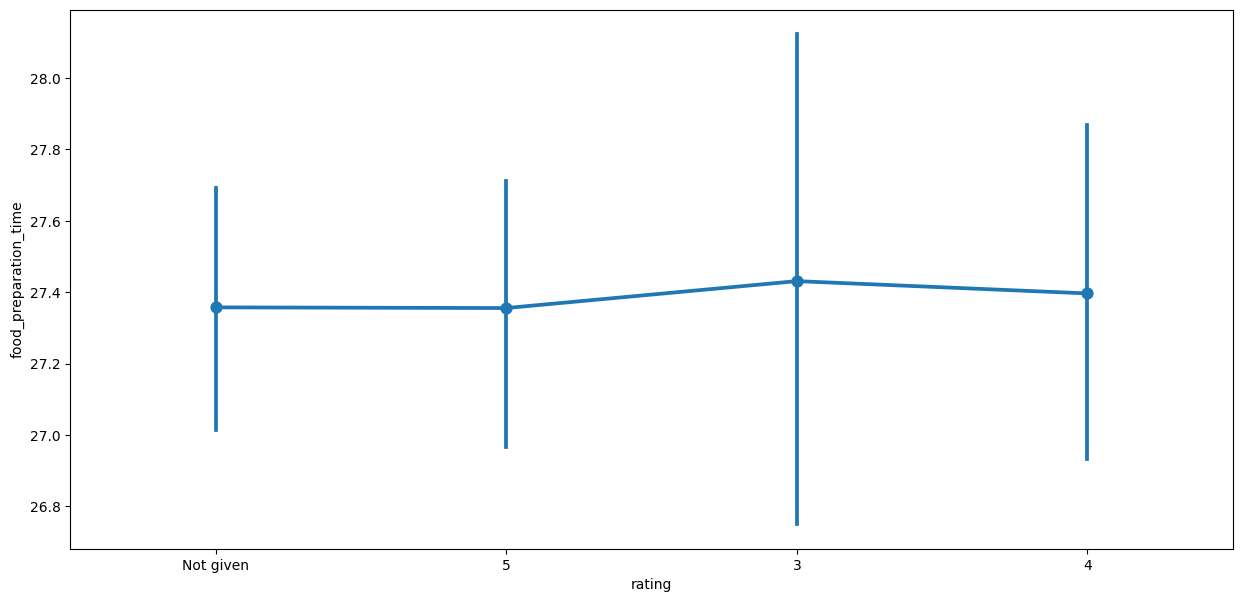

In [36]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

### Observations:

The food preparation time seems consistent across different ratings, with only minor fluctuations, other factors may overshadow its impact.

## Rating vs Cost of the Order

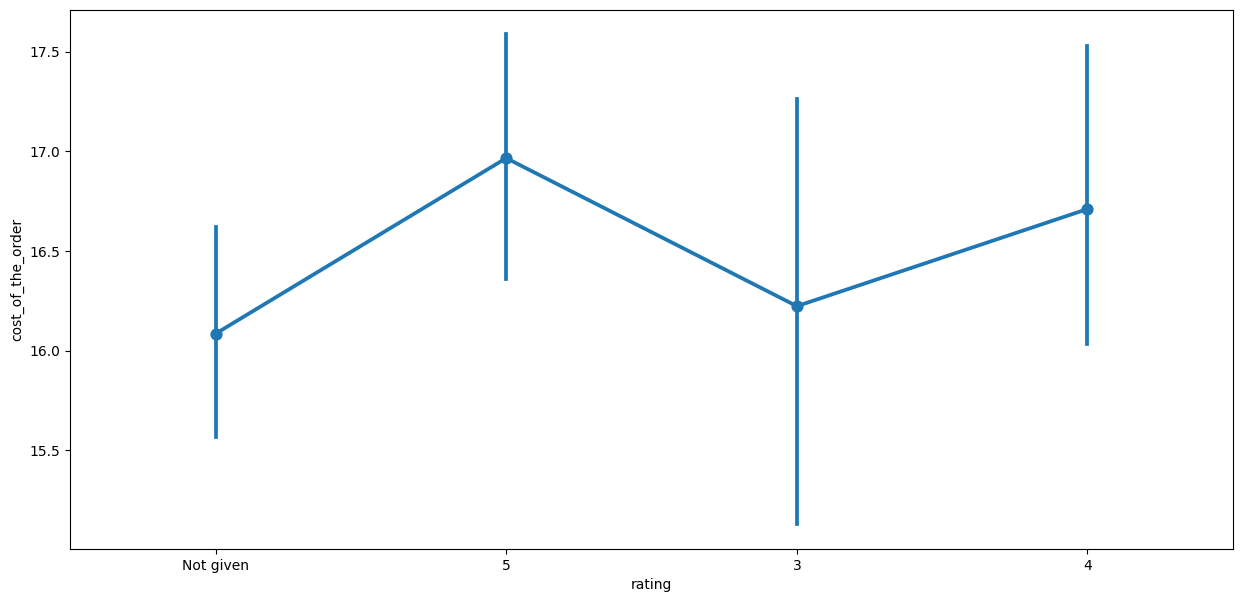

In [37]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### Observations:

Higher average order costs are associated with unrated orders, while the lowest average costs are associated with the highest-rated orders (5 stars).

## Correlation among Variables

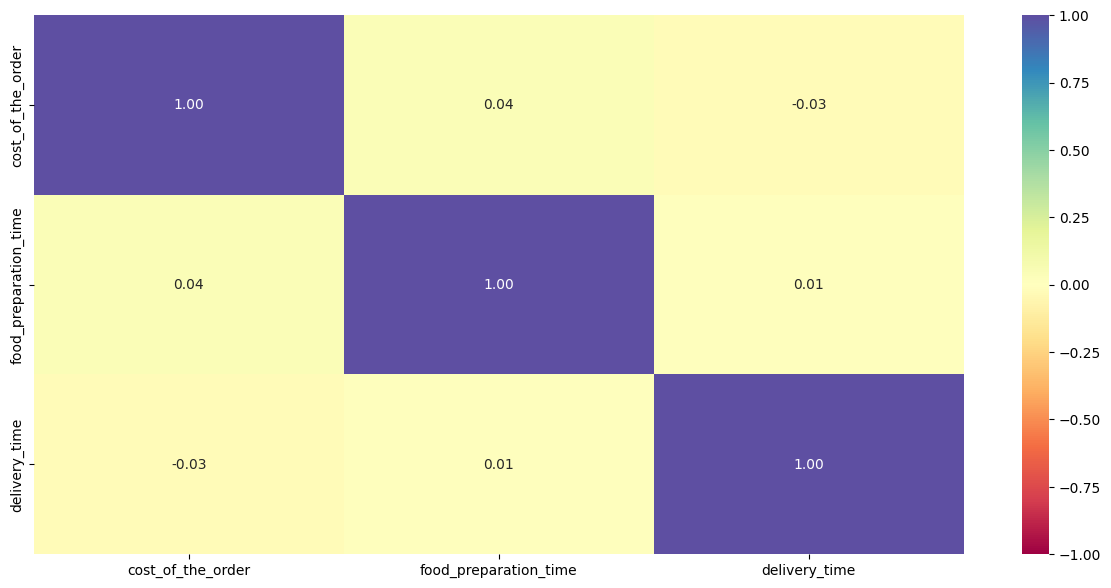

In [38]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:

* None of the variables strongly correlate with each other.
* While there are minor correlations, they are very weak and may not have significant implications for business operations.

### If the company wants to provide a promotional offer in the advertisement of the restaurants and the condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4, what would be the restaurants fulfilling the criteria to get the promotional offer?

In [39]:
# Filtering the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(4)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [40]:
# Getting the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings and finding the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### If the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars, what would be the net revenue generated by the company across all orders?

In [41]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [42]:
# Total revenue
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The overall profit for these orders turns out to be 19.69%


### If the company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [43]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df_greater_than_60 = df[df['total_time']>60]

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders that take more than 60 minutes:", round(percentage, 2), '%')

Percentage of orders that take more than 60 minutes: 10.54 %


#### Observations:
There are 245 orders out of the 1898 that take more than 60 minutes.


### If the company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [44]:
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
The mean delivery time on weekends is 6 minutes lower than in the weekdays eventhough the demand is higher.


# **Conclusions and Recommendations**

### Conclusions:
*  American cuisine stands out as the most favored, particularly during weekends, indicating a cultural or convenience preference influencing food choices.
* A correlation exists between the top-rated restaurants and the volume of orders, suggesting that customer satisfaction significantly influences consumer choice.
* Generally, customers are satisfied, with high ratings dominating. However, there's a noticeable impact of extended food preparation times on customer ratings, highlighting efficiency and prompt service as crucial factors for customer experience.
* Higher-rated orders correlate with shorter delivery times, especially during high-demand periods (weekends). This consistency in service quality, regardless of demand surges, likely contributes to overall customer satisfaction.
* The average times for food preparation and delivery are reasonable, but the slight increase in preparation time for lower-rated orders suggests room for improvement in operational efficiencies.
* The significant increase in order volume over weekends indicates a need to manage resources efficiently during peak times to maintain service quality.
* American cuisine generates the most revenue, making it a critical segment for the business. Strategic efforts should prioritize maintaining the quality, efficiency, and variety within this cuisine segment to sustain and potentially increase revenue.

### Recommendations:

*      Collaborate with restaurants, especially those offering American cuisine, to devise strategies to reduce food preparation times, particularly during weekends. Solutions could include pre-preparation of ingredients, additional staffing during peak hours, or more efficient kitchen practices.
* Consider implementing a dynamic delivery management system that allocates resources based on real-time demand, ensuring faster delivery times during busy periods.
* For restaurants with high order volumes but average ratings, initiate quality enhancement programs. Regularly collect and analyze customer feedback to guide restaurants on areas needing improvement.
* Conduct a thorough market analysis to reassess the pricing strategy. Ensure prices are competitive, reflecting both customer preferences for affordability and the need to cover increased operational costs during peak times.
* Evaluate the current commission structures with restaurants to ensure a win-win situation. For top-performing restaurants (in terms of ratings and order volumes), consider negotiating terms that provide mutual growth opportunities.
* Establish a more robust data collection and analysis mechanism, capturing wider customer feedback, specific bottlenecks in delivery, and detailed customer preferences.
* Strengthen partnerships with the top-performing restaurants by co-branding initiatives, shared marketing campaigns, or even exclusive menu items. Their success and popularity could positively rub off on the food aggregator brand.
* Initiate a quality assurance program that ensures partnered restaurants maintain a high standard. This program can also serve as a benchmark for new restaurants looking to join the platform, ensuring the aggregator brand is synonymous with quality.

---